In [ ]:
# getting data
import zipfile

!wget https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip

# unzip the file
zip_ref = zipfile.ZipFile("pizza_steak.zip")
zip_ref.extractall()
zip_ref.close()

--2023-02-07 08:21:19--  https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 172.253.122.128, 172.253.63.128, 142.251.111.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|172.253.122.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 109540975 (104M) [application/zip]
Saving to: ‘pizza_steak.zip’

pizza_steak.zip     100%[===================>] 104.47M   196MB/s    in 0.5s    

2023-02-07 08:21:19 (196 MB/s) - ‘pizza_steak.zip’ saved [109540975/109540975]



In [ ]:
import os

# getting number of images
for dirpath, dirnames, filenames in os.walk("pizza_steak"):
  print(f"There are {len(dirnames)} directories and {len(filenames)} images in {dirpath}")

There are 2 directories and 0 images in pizza_steak
There are 2 directories and 0 images in pizza_steak/train
There are 0 directories and 750 images in pizza_steak/train/pizza
There are 0 directories and 750 images in pizza_steak/train/steak
There are 2 directories and 0 images in pizza_steak/test
There are 0 directories and 250 images in pizza_steak/test/pizza
There are 0 directories and 250 images in pizza_steak/test/steak


In [ ]:
import pathlib
import numpy as np
data_dir = pathlib.Path("pizza_steak/train")
class_names = np.array(sorted(item.name for item in data_dir.glob("*")))
class_names

array(['pizza', 'steak'], dtype='<U5')

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random

# function to view random image
def view_random_image(target_dir, target_class):
  target_folder = target_dir + target_class

  random_image = random.sample(os.listdir(target_folder), 1)

  img = mpimg.imread(target_folder + "/" + random_image[0])
  plt.imshow(img)
  plt.title(target_class)
  plt.axis("off")

  print(f"Image shape: {img.shape}")

  return img

Image shape: (306, 512, 3)


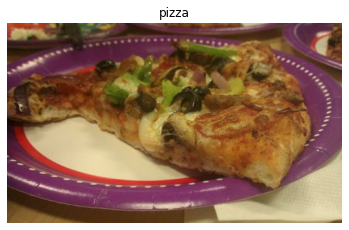

In [ ]:
img = view_random_image("pizza_steak/train/", "pizza")

In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

tf.random.set_seed(42)

# preprocessing data
train_datagen = ImageDataGenerator(rescale=1./255)
valid_datagen = ImageDataGenerator(rescale=1./255)

# setup path to data
train_dir = "/content/pizza_steak/train"
test_dir = "/content/pizza_steak/test"

# importing data from dir and turning into batches
train_data = train_datagen.flow_from_directory(train_dir, 
                                               batch_size=32, 
                                               target_size=(224, 224),
                                               class_mode="binary",
                                               seed=42)

valid_data = valid_datagen.flow_from_directory(test_dir,
                                               batch_size=32,
                                               target_size=(224, 224),
                                               class_mode="binary",
                                               seed=42)

Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.


In [ ]:
# building model
tf.random.set_seed(42)

model_1 = tf.keras.Sequential([
    tf.keras.layers.Conv2D(filters=10, kernel_size=3, activation="relu", input_shape=(224, 224, 3)),
    tf.keras.layers.Conv2D(10, 3, activation="relu"),
    tf.keras.layers.MaxPool2D(pool_size=2, padding="valid"),
    tf.keras.layers.Conv2D(10, 3, activation="relu"),
    tf.keras.layers.Conv2D(10, 3, activation="relu"),
    tf.keras.layers.MaxPool2D(2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1, activation="sigmoid")
])

model_1.compile(
    loss=tf.keras.losses.BinaryCrossentropy(),
    optimizer=tf.keras.optimizers.Adam(),
    metrics=["accuracy"]
)

model_1.fit(train_data,
            epochs=5,
            steps_per_epoch=len(train_data),
            validation_data=valid_data,
            validation_steps=len(valid_data))

Epoch 1/5
47/47 [==============================] - 28s 390ms/step - loss: 0.5799 - accuracy: 0.6933 - val_loss: 0.4330 - val_accuracy: 0.8200
Epoch 2/5
47/47 [==============================] - 10s 206ms/step - loss: 0.4330 - accuracy: 0.8033 - val_loss: 0.3551 - val_accuracy: 0.8560
Epoch 3/5
47/47 [==============================] - 10s 207ms/step - loss: 0.4029 - accuracy: 0.8233 - val_loss: 0.3673 - val_accuracy: 0.8420
Epoch 4/5
47/47 [==============================] - 9s 188ms/step - loss: 0.3854 - accuracy: 0.8340 - val_loss: 0.3356 - val_accuracy: 0.8660
Epoch 5/5
47/47 [==============================] - 10s 202ms/step - loss: 0.3456 - accuracy: 0.8560 - val_loss: 0.2913 - val_accuracy: 0.8800


In [ ]:
model_1.summary()  

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 10)      280       
                                                                 
 conv2d_1 (Conv2D)           (None, 220, 220, 10)      910       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 110, 110, 10)     0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 108, 108, 10)      910       
                                                                 
 conv2d_3 (Conv2D)           (None, 106, 106, 10)      910       
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 53, 53, 10)       0         
 2D)                                                    

## Breaking it Down

Image shape: (512, 512, 3)
Image shape: (512, 512, 3)


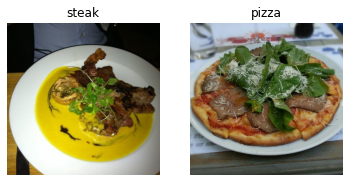

In [ ]:
# visualising some images
plt.figure()
plt.subplot(1, 2, 1)
steak_img = view_random_image("pizza_steak/train/", "steak")
plt.subplot(1, 2, 2)
pizza_img = view_random_image("pizza_steak/train/", "pizza")

In [ ]:
# preprocessing
train_dir = "pizza_steak/train/"
test_dir = "pizza_steak/test/"

In [ ]:
# turning data into batches (a small subset of the data)
# create train and test data generators and rescaling
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

In [ ]:
# loading in images and turning into batches
train_data = train_datagen.flow_from_directory(train_dir,
                                               target_size=(224, 224),
                                               class_mode="binary",
                                               batch_size=32)
test_data = train_datagen.flow_from_directory(test_dir,
                                               target_size=(224, 224),
                                               class_mode="binary",
                                               batch_size=32)

Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.


In [ ]:
# creating model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Conv2D, Flatten, Dense, MaxPool2D, Activation
from tensorflow.keras import Sequential
from tensorflow.keras.losses import BinaryCrossentropy

In [ ]:
tf.random.set_seed(42)

model_2 = Sequential([
    Conv2D(filters=10, kernel_size=3, strides=1, padding="valid",
           activation="relu", input_shape=(224, 224, 3)),
    Conv2D(10, 3, activation="relu"),
    Conv2D(10, 3, activation="relu"),
    Flatten(),
    Dense(1, activation="sigmoid")
])

model_2.compile(
    loss=BinaryCrossentropy(),
    optimizer=Adam(),
    metrics=["accuracy"]
)

history_2 = model_2.fit(train_data, epochs=5, steps_per_epoch=len(train_data),
                        validation_data=test_data, validation_steps=len(test_data))

Epoch 1/5
47/47 [==============================] - 11s 217ms/step - loss: 0.8700 - accuracy: 0.6233 - val_loss: 0.5481 - val_accuracy: 0.7000
Epoch 2/5
47/47 [==============================] - 11s 237ms/step - loss: 0.5074 - accuracy: 0.7760 - val_loss: 0.3651 - val_accuracy: 0.8360
Epoch 3/5
47/47 [==============================] - 10s 207ms/step - loss: 0.3812 - accuracy: 0.8460 - val_loss: 0.3650 - val_accuracy: 0.8460
Epoch 4/5
47/47 [==============================] - 10s 206ms/step - loss: 0.3025 - accuracy: 0.8827 - val_loss: 0.3556 - val_accuracy: 0.8420
Epoch 5/5
47/47 [==============================] - 9s 190ms/step - loss: 0.2413 - accuracy: 0.9187 - val_loss: 0.3475 - val_accuracy: 0.8460


In [ ]:
model_2.evaluate(test_data)

16/16 [==============================] - 3s 188ms/step - loss: 0.3475 - accuracy: 0.8460


[0.3475324213504791, 0.8460000157356262]

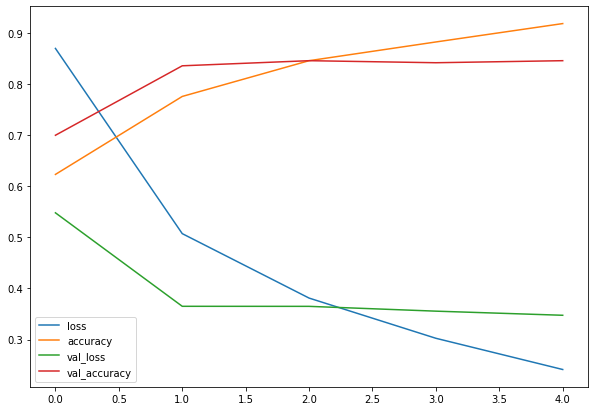

In [ ]:
# plotting training curves
import pandas as pd
pd.DataFrame(history_2.history).plot(figsize=(10, 7))

In [ ]:
# plotting validation and training seperately
def plot_loss_curves(history):
  """
  Returns seperate loss curves for training and validation metrics
  """
  loss = history.history["loss"]
  val_loss = history.history["val_loss"]
  accuracy = history.history["accuracy"]
  val_accuracy = history.history["val_accuracy"]
  epochs = range(len(history.history["loss"]))

  plt.figure(figsize=(20, 7))
  plt.subplot(1, 2, 1)
  plt.plot(epochs, loss, label="training_loss")
  plt.plot(epochs, val_loss, label="val_loss")
  plt.title("Loss curves")
  plt.xlabel("epochs")
  plt.legend()

  plt.subplot(1, 2, 2)
  plt.plot(epochs, accuracy, label="training_accuracy")
  plt.plot(epochs, val_accuracy, label="val_accuracy")
  plt.title("Accuracy curves")
  plt.xlabel("epochs")
  plt.legend()

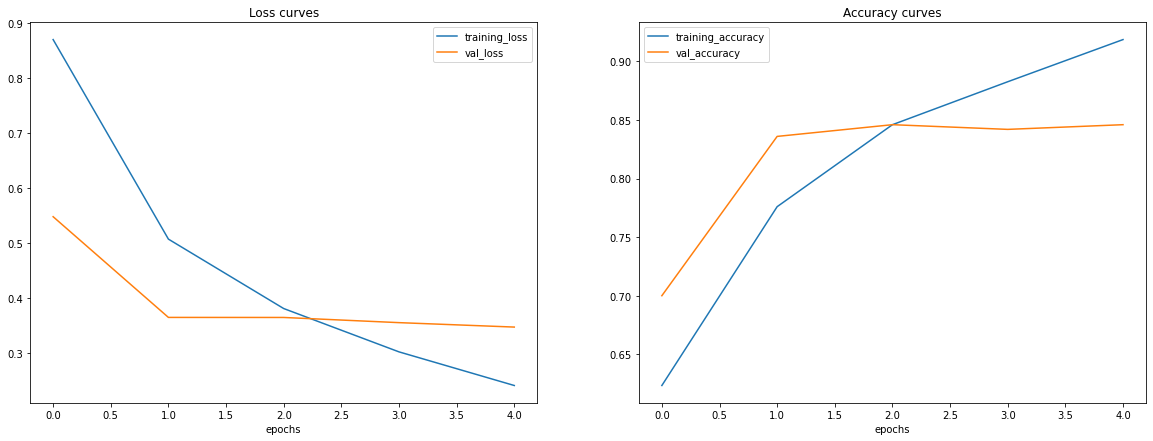

In [ ]:
plot_loss_curves(history_2)

### Model is overfitting, the model is not performing well on the validation data

In [ ]:
# adding MaxPool2D to reduce overfitting
tf.random.set_seed(42)

model_3 = Sequential([
    Conv2D(10, 3, activation="relu", input_shape=(224, 224, 3)),
    MaxPool2D(2),
    Conv2D(10, 3, activation="relu"),
    MaxPool2D(2),
    Conv2D(10, 3, activation="relu"),
    MaxPool2D(2),
    Flatten(),
    Dense(1, activation="sigmoid")
])

In [ ]:
model_3.compile(
    loss=BinaryCrossentropy(),
    optimizer=Adam(),
    metrics=["accuracy"]
)

In [ ]:
history_3 = model_3.fit(train_data, epochs=5, steps_per_epoch=len(train_data),
                        validation_data=test_data, validation_steps=len(test_data))

Epoch 1/5
47/47 [==============================] - 10s 208ms/step - loss: 0.6233 - accuracy: 0.6387 - val_loss: 0.4344 - val_accuracy: 0.8180
Epoch 2/5
47/47 [==============================] - 8s 179ms/step - loss: 0.4484 - accuracy: 0.7893 - val_loss: 0.3646 - val_accuracy: 0.8540
Epoch 3/5
47/47 [==============================] - 9s 200ms/step - loss: 0.3978 - accuracy: 0.8153 - val_loss: 0.3315 - val_accuracy: 0.8560
Epoch 4/5
47/47 [==============================] - 9s 201ms/step - loss: 0.3795 - accuracy: 0.8287 - val_loss: 0.3084 - val_accuracy: 0.8760
Epoch 5/5
47/47 [==============================] - 9s 197ms/step - loss: 0.3705 - accuracy: 0.8440 - val_loss: 0.2973 - val_accuracy: 0.8840


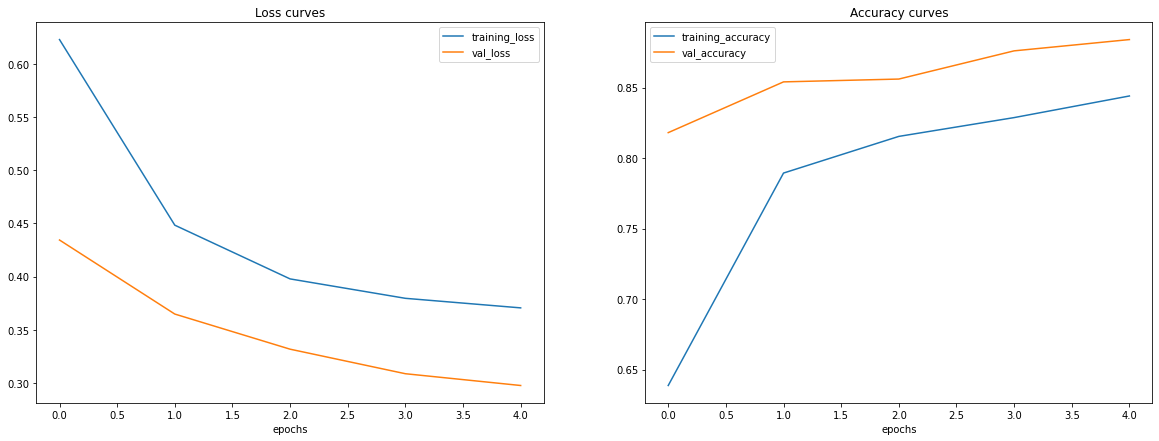

In [ ]:
plot_loss_curves(history_3)

In [ ]:
# adding data augmentation
train_datagen_augmented = ImageDataGenerator(rescale=1/255.,
                                             rotation_range=0.2,
                                             shear_range=0.2,
                                             zoom_range=0.2,
                                             width_shift_range=0.2,
                                             height_shift_range=0.2,
                                             horizontal_flip=True)

# without augmentation
train_datagen = ImageDataGenerator(rescale=1/255.)
test_datagen = ImageDataGenerator(rescale=1/255.)

In [ ]:
# loading in data
print("Augmented training data:")
train_data_augmented = train_datagen_augmented.flow_from_directory(train_dir,
                                                                   target_size=(224, 224),
                                                                   batch_size=32,
                                                                   class_mode="binary",
                                                                   shuffle=False)
print("Non augmented training data:")
train_data = train_datagen.flow_from_directory(train_dir,
                                              target_size=(224, 224),
                                              batch_size=32,
                                              class_mode="binary",
                                              shuffle=False)

print("Non augmented test data:")
test_data = test_datagen.flow_from_directory(test_dir,
                                             target_size=(224, 224),
                                             batch_size=32,
                                             class_mode="binary")

Augmented training data:
Found 1500 images belonging to 2 classes.
Non augmented training data:
Found 1500 images belonging to 2 classes.
Non augmented test data:
Found 500 images belonging to 2 classes.


In [ ]:
images, labels = train_data.next()
aug_images, aug_labels = train_data_augmented.next() # labels are not augmented

(-0.5, 223.5, 223.5, -0.5)

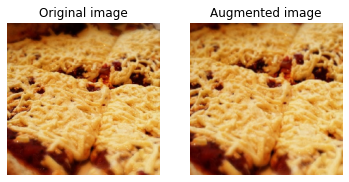

In [ ]:
random_number = random.randint(0, 31) # batch size 32
plt.subplot(1, 2, 1)
plt.imshow(images[random_number])
plt.title("Original image")
plt.axis(False)
plt.subplot(1, 2, 2)
plt.imshow(aug_images[random_number])
plt.title("Augmented image")
plt.axis(False)

In [ ]:
tf.random.set_seed(42)

model_4 = Sequential([
    Conv2D(10, 3, activation="relu", input_shape=(224, 224, 3)),
    MaxPool2D(2),
    Conv2D(10, 3, activation="relu"),
    MaxPool2D(2),
    Conv2D(10, 3, activation="relu"),
    MaxPool2D(2),
    Flatten(),
    Dense(1, activation="sigmoid")
])

model_4.compile(
    loss=BinaryCrossentropy(),
    optimizer=Adam(),
    metrics=["accuracy"]
)

history_4 = model_4.fit(train_data_augmented, epochs=5, steps_per_epoch=len(train_data_augmented),
                        validation_data=test_data, validation_steps=len(test_data))

Epoch 1/5
47/47 [==============================] - 23s 492ms/step - loss: 0.7104 - accuracy: 0.4640 - val_loss: 0.6877 - val_accuracy: 0.5040
Epoch 2/5
47/47 [==============================] - 23s 483ms/step - loss: 0.6855 - accuracy: 0.5360 - val_loss: 0.6819 - val_accuracy: 0.5000
Epoch 3/5
47/47 [==============================] - 23s 487ms/step - loss: 0.6890 - accuracy: 0.5867 - val_loss: 0.6659 - val_accuracy: 0.6080
Epoch 4/5
47/47 [==============================] - 23s 485ms/step - loss: 0.6798 - accuracy: 0.5687 - val_loss: 0.6201 - val_accuracy: 0.6780
Epoch 5/5
47/47 [==============================] - 23s 484ms/step - loss: 0.6553 - accuracy: 0.6273 - val_loss: 0.5652 - val_accuracy: 0.8260


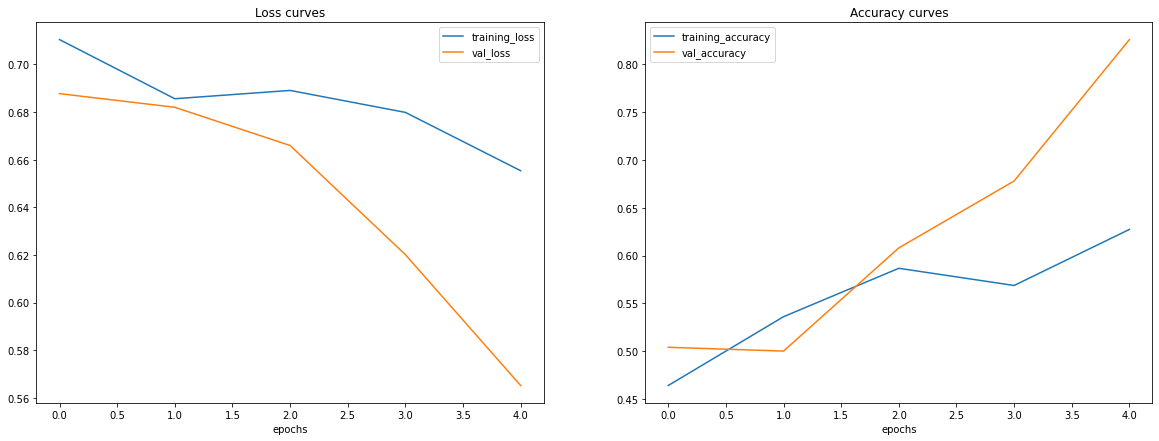

In [ ]:
plot_loss_curves(history_4)

### Maybe the non shuffled data made the model learn pizza too well before steak


In [ ]:
train_data_augmented_shuffled = train_datagen_augmented.flow_from_directory(train_dir,
                                                                            target_size=(224, 224),
                                                                            batch_size=32,
                                                                            class_mode="binary",
                                                                            shuffle=True)

Found 1500 images belonging to 2 classes.


In [ ]:
tf.random.set_seed(42)

model_5 = Sequential([
    Conv2D(10, 3, activation="relu", input_shape=(224, 224, 3)),
    MaxPool2D(2),
    Conv2D(10, 3, activation="relu"),
    MaxPool2D(2),
    Conv2D(10, 3, activation="relu"),
    MaxPool2D(2),
    Flatten(),
    Dense(1, activation="sigmoid")
])

model_5.compile(
    loss=BinaryCrossentropy(),
    optimizer=Adam(),
    metrics=["accuracy"]
)

history_5 = model_5.fit(train_data_augmented_shuffled,
                        epochs=5, steps_per_epoch=len(train_data_augmented_shuffled),
                        validation_data=test_data, validation_steps=len(test_data))

Epoch 1/5
47/47 [==============================] - 24s 487ms/step - loss: 0.6446 - accuracy: 0.6360 - val_loss: 0.5426 - val_accuracy: 0.7380
Epoch 2/5
47/47 [==============================] - 23s 489ms/step - loss: 0.5637 - accuracy: 0.7180 - val_loss: 0.4467 - val_accuracy: 0.7880
Epoch 3/5
47/47 [==============================] - 23s 490ms/step - loss: 0.5154 - accuracy: 0.7493 - val_loss: 0.4065 - val_accuracy: 0.8060
Epoch 4/5
47/47 [==============================] - 23s 490ms/step - loss: 0.5134 - accuracy: 0.7560 - val_loss: 0.3755 - val_accuracy: 0.8540
Epoch 5/5
47/47 [==============================] - 23s 489ms/step - loss: 0.4803 - accuracy: 0.7747 - val_loss: 0.3679 - val_accuracy: 0.8600


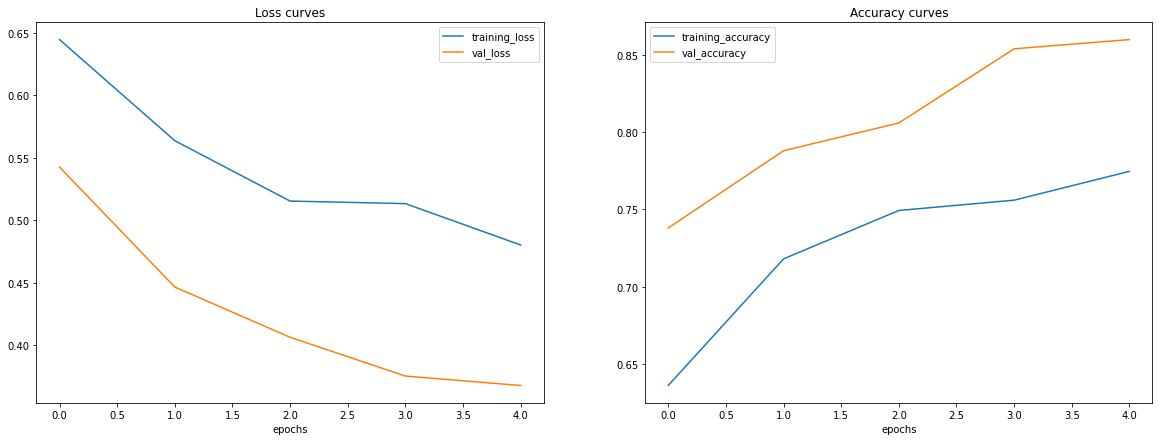

In [ ]:
plot_loss_curves(history_5)

In [ ]:
# adding more conv layers
tf.random.set_seed(42)

model_6 = Sequential([
    Conv2D(10, 3, activation="relu", input_shape=(224, 224, 3)),
    Conv2D(10, 3, activation="relu"),
    MaxPool2D(2),
    Conv2D(10, 3, activation="relu"),
    Conv2D(10, 3, activation="relu"),
    MaxPool2D(2),
    Conv2D(10, 3, activation="relu"),
    Conv2D(10, 3, activation="relu"),
    MaxPool2D(2),
    Flatten(),
    Dense(1, activation="sigmoid")
])

model_6.compile(
    loss=BinaryCrossentropy(),
    optimizer=Adam(),
    metrics=["accuracy"]
)

history_6 = model_6.fit(train_data_augmented_shuffled,
                        epochs=5, steps_per_epoch=len(train_data_augmented_shuffled),
                        validation_data=test_data, validation_steps=len(test_data))

Epoch 1/5
47/47 [==============================] - 24s 503ms/step - loss: 0.6721 - accuracy: 0.5773 - val_loss: 0.5675 - val_accuracy: 0.7120
Epoch 2/5
47/47 [==============================] - 23s 495ms/step - loss: 0.5879 - accuracy: 0.6833 - val_loss: 0.5187 - val_accuracy: 0.7260
Epoch 3/5
47/47 [==============================] - 23s 498ms/step - loss: 0.5391 - accuracy: 0.7367 - val_loss: 0.3924 - val_accuracy: 0.8320
Epoch 4/5
47/47 [==============================] - 23s 497ms/step - loss: 0.4689 - accuracy: 0.7927 - val_loss: 0.3416 - val_accuracy: 0.8440
Epoch 5/5
47/47 [==============================] - 23s 494ms/step - loss: 0.4719 - accuracy: 0.7807 - val_loss: 0.3376 - val_accuracy: 0.8700


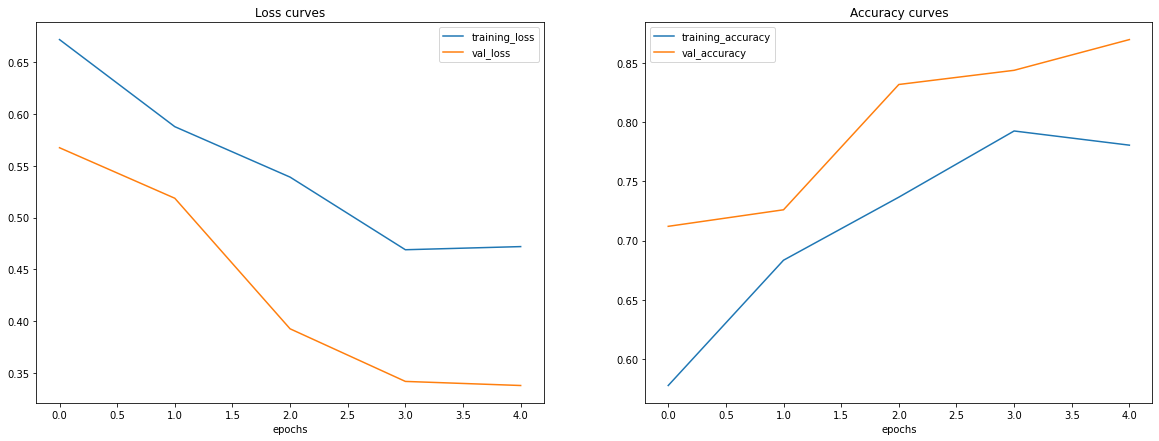

In [ ]:
plot_loss_curves(history_6)

--2023-02-07 08:30:45--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-steak.jpeg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1978213 (1.9M) [image/jpeg]
Saving to: ‘03-steak.jpeg’

03-steak.jpeg       100%[===================>]   1.89M  --.-KB/s    in 0.01s   

2023-02-07 08:30:45 (198 MB/s) - ‘03-steak.jpeg’ saved [1978213/1978213]



(-0.5, 3023.5, 4031.5, -0.5)

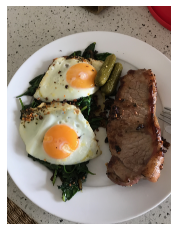

In [ ]:
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-steak.jpeg
steak = mpimg.imread("03-steak.jpeg")
plt.imshow(steak)
plt.axis(False)

In [ ]:
# need to rescale and reshape the image
def load_and_prep_image(filename, imshape=224):
  """
  Read image from file and converts to predictable tensor
  """
  img = tf.io.read_file(filename)
  img = tf.image.decode_image(img)
  img = tf.image.resize(img, size=[imshape, imshape])
  img = img / 255.
  return img

In [ ]:
test_steak = load_and_prep_image("03-steak.jpeg")
test_steak.shape

TensorShape([224, 224, 3])

In [ ]:
y_pred = model_6.predict(tf.expand_dims(test_steak, axis=0))

1/1 [==============================] - 0s 242ms/step


### Class 1 is steak (based on folder arrangement when read in)

In [ ]:
# transforming prediction
pred_class = class_names[int(tf.round(y_pred))]

In [ ]:
def pred_and_plot(model, filename, class_names=class_names):
  """
  Imports image at filename, makes a prediction and
  plots image with predicted title
  """
  img = load_and_prep_image(filename)
  pred = model.predict(tf.expand_dims(img, axis=0))
  pred_class = class_names[int(tf.round(pred))]
  plt.figure()
  plt.imshow(img)
  plt.title(f"Prediction: {pred_class}")
  plt.axis(False)

1/1 [==============================] - 0s 21ms/step


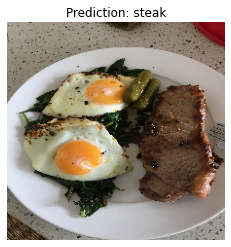

In [ ]:
pred_and_plot(model_6, "03-steak.jpeg")

### Trying my own images

--2023-02-07 08:30:48--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-pizza-dad.jpeg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2874848 (2.7M) [image/jpeg]
Saving to: ‘03-pizza-dad.jpeg’

03-pizza-dad.jpeg   100%[===================>]   2.74M  --.-KB/s    in 0.01s   

2023-02-07 08:30:48 (215 MB/s) - ‘03-pizza-dad.jpeg’ saved [2874848/2874848]

1/1 [==============================] - 0s 19ms/step


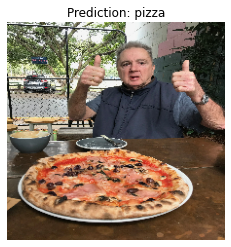

In [ ]:
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-pizza-dad.jpeg
pred_and_plot(model_6, "03-pizza-dad.jpeg")

--2023-02-07 08:30:48--  https://st.depositphotos.com/1011514/3590/i/950/depositphotos_35905577-stock-photo-tasty-pizza.jpg
Resolving st.depositphotos.com (st.depositphotos.com)... 23.54.220.90
Connecting to st.depositphotos.com (st.depositphotos.com)|23.54.220.90|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 175557 (171K) [image/jpeg]
Saving to: ‘depositphotos_35905577-stock-photo-tasty-pizza.jpg’

depositphotos_35905 100%[===================>] 171.44K  --.-KB/s    in 0.03s   

2023-02-07 08:30:49 (6.04 MB/s) - ‘depositphotos_35905577-stock-photo-tasty-pizza.jpg’ saved [175557/175557]

1/1 [==============================] - 0s 23ms/step


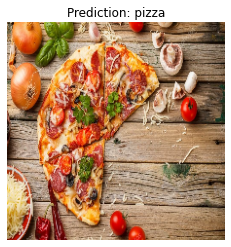

In [ ]:
!wget https://st.depositphotos.com/1011514/3590/i/950/depositphotos_35905577-stock-photo-tasty-pizza.jpg
pred_and_plot(model_6, "depositphotos_35905577-stock-photo-tasty-pizza.jpg")

--2023-02-07 08:30:49--  https://www.shutterstock.com/image-photo/grilled-beef-steaks-spices-on-260nw-439021402.jpg
Resolving www.shutterstock.com (www.shutterstock.com)... 18.67.76.87, 18.67.76.64, 18.67.76.121, ...
Connecting to www.shutterstock.com (www.shutterstock.com)|18.67.76.87|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 45099 (44K) [image/jpeg]
Saving to: ‘grilled-beef-steaks-spices-on-260nw-439021402.jpg’

grilled-beef-steaks 100%[===================>]  44.04K  --.-KB/s    in 0.002s  

2023-02-07 08:30:49 (19.8 MB/s) - ‘grilled-beef-steaks-spices-on-260nw-439021402.jpg’ saved [45099/45099]

1/1 [==============================] - 0s 17ms/step


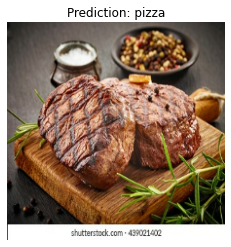

In [ ]:
!wget https://www.shutterstock.com/image-photo/grilled-beef-steaks-spices-on-260nw-439021402.jpg
pred_and_plot(model_6, "grilled-beef-steaks-spices-on-260nw-439021402.jpg")

### Multiclass Image Classification

In [ ]:
# importing data
import zipfile
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip
zip_ref = zipfile.ZipFile("10_food_classes_all_data.zip")
zip_ref.extractall()
zip_ref.close()

In [ ]:
import os
for dirpath, dirnames, filenames in os.walk("10_food_classes_all_data"):
  print(f"There are {len(dirnames)} directories and {len(filenames)} images in {dirpath}")

In [ ]:
train_dir = "10_food_classes_all_data/train/"
test_dir = "10_food_classes_all_data/test/"

In [ ]:
import pathlib
import numpy as np
data_dir = pathlib.Path(train_dir)
class_names = np.array(sorted([item.name for item in data_dir.glob("*")]))
class_names

In [ ]:
import random
img = view_random_image(train_dir, random.choice(class_names))

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(rescale=1/255.)

test_datagen = ImageDataGenerator(rescale=1/255.)

train_data = train_datagen.flow_from_directory(train_dir, 
                                               target_size=(224, 224), 
                                               class_mode="categorical")

test_data = test_datagen.flow_from_directory(test_dir,
                                              target_size=(224, 224),
                                              class_mode="categorical")

In [ ]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPool2D
from tensorflow.keras.losses import CategoricalCrossentropy
from tensorflow.keras.optimizers import Adam

tf.random.set_seed(42)

model_categorical_1 = Sequential([
    Conv2D(10, 3, activation="relu", input_shape=(224, 224, 3)),
    Conv2D(10, 3, activation="relu"),
    MaxPool2D(2),
    Conv2D(10, 3, activation="relu"),
    Conv2D(10, 3, activation="relu"),
    MaxPool2D(2),
    Flatten(),
    Dense(10, activation="softmax")
])

model_categorical_1.compile(
    loss=CategoricalCrossentropy(),
    optimizer=Adam(),
    metrics=["accuracy"]
)

In [ ]:
history_categorical_1 = model_categorical_1.fit(train_data, epochs=5, steps_per_epoch=len(train_data),
                                                validation_data=test_data, validation_steps=len(test_data))

In [ ]:
plot_loss_curves(history_categorical_1)

### Model is clearly overfitting 

In [ ]:
# reducing layers
tf.random.set_seed(42)

model_categorical_2 = Sequential([
    Conv2D(10, 3, activation="relu", input_shape=(224, 224, 3)),
    MaxPool2D(2),
    Conv2D(10, 3, activation="relu"),
    MaxPool2D(2),
    Flatten(),
    Dense(10, activation="softmax")
])

model_categorical_2.compile(
    loss=CategoricalCrossentropy(),
    optimizer=Adam(),
    metrics=["accuracy"]
)

In [ ]:
history_categorical_2 = model_categorical_2.fit(train_data, epochs=5, steps_per_epoch=len(train_data),
                                                validation_data=test_data, validation_steps=len(test_data))

In [ ]:
plot_loss_curves(history_categorical_2)

### Model is still overfitting

In [ ]:
# adding data augmentation
train_datagen_augmented = ImageDataGenerator(rescale=1/255.,
                                             rotation_range=0.2,
                                             width_shift_range=0.2,
                                             height_shift_range=0.2,
                                             zoom_range=0.2,
                                             horizontal_flip=True)
train_data_augmented = train_datagen_augmented.flow_from_directory(train_dir,
                                                                   target_size=(224, 224),
                                                                   class_mode="categorical")

In [ ]:
tf.random.set_seed(42)

model_categorical_3 = tf.keras.models.clone_model(model_categorical_1)

model_categorical_3.compile(
    loss=CategoricalCrossentropy(),
    optimizer=Adam(),
    metrics=["accuracy"]
)

In [ ]:
history_categorical_3 = model_categorical_3.fit(train_data_augmented,
                                                epochs=5, steps_per_epoch=len(train_data_augmented),
                                                validation_data=test_data, validation_steps=len(test_data))

In [ ]:
plot_loss_curves(history_categorical_3)

In [65]:
# making predictions
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-hamburger.jpeg
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-pizza-dad.jpeg
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-sushi.jpeg

--2023-02-07 08:52:44--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-hamburger.jpeg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3564285 (3.4M) [image/jpeg]
Saving to: ‘03-hamburger.jpeg.1’

03-hamburger.jpeg.1 100%[===================>]   3.40M  --.-KB/s    in 0.01s   

2023-02-07 08:52:44 (236 MB/s) - ‘03-hamburger.jpeg.1’ saved [3564285/3564285]

--2023-02-07 08:52:44--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-pizza-dad.jpeg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, await

In [66]:
# reconfiguring to work with categorical data
def pred_and_plot(model, filename, class_names=class_names):
  """
  Imports image at filename, makes a prediction and
  plots image with predicted title
  """
  img = load_and_prep_image(filename)
  pred = model.predict(tf.expand_dims(img, axis=0))
  pred_class = class_names[tf.argmax(pred, axis=-1)]
  plt.figure()
  plt.imshow(img)
  plt.title(f"Prediction: {pred_class}")
  plt.axis(False)

1/1 [==============================] - 0s 55ms/step


<ipython-input-66-31b02214de02>:9: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  pred_class = class_names[tf.argmax(pred, axis=-1)]


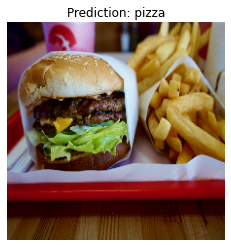

In [67]:
pred_and_plot(model_categorical_3, "03-hamburger.jpeg")

1/1 [==============================] - 0s 81ms/step


<ipython-input-66-31b02214de02>:9: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  pred_class = class_names[tf.argmax(pred, axis=-1)]


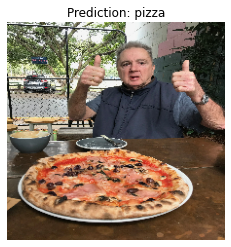

In [68]:
pred_and_plot(model_categorical_3, "03-pizza-dad.jpeg")

1/1 [==============================] - 0s 19ms/step


<ipython-input-66-31b02214de02>:9: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  pred_class = class_names[tf.argmax(pred, axis=-1)]


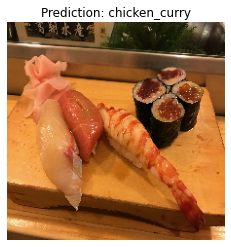

In [69]:
pred_and_plot(model_categorical_3, "03-sushi.jpeg")